In [1]:
!pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.3 MB/s eta 0:00:00


In [2]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm


In [7]:

def add_noise(img):
    noise = np.random.normal(0, 25, img.shape).astype(np.int16)  # Using int16 for the noise
    img = img.astype(np.int16)  # Convert the image to int16 format as well
    noised_img = img + noise  # Add noise
    noised_img = np.clip(noised_img, 0, 255)  # Clip to 0-255 range
    return noised_img.astype(np.uint8)  # Convert back to uint8


source_folder = "raw_livrable_1"
destination_folder = "noised_livrable_1"
selected_subfolders = ["Photo"]#["Photo", "Category2"]  

(113, 88, 92)
[154  60  62]


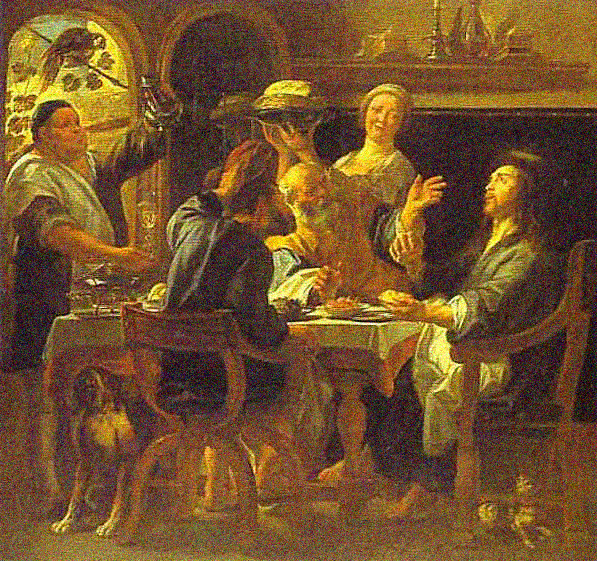

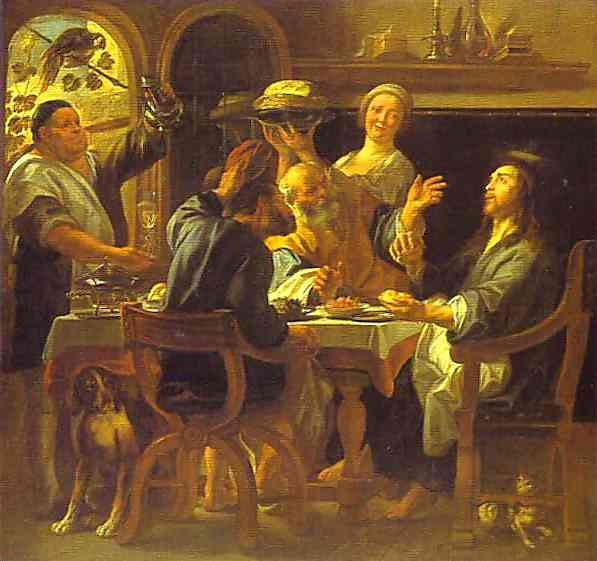

In [4]:
img= Image.open("raw_livrable_1/Painting/painting_00002.jpg")
print(img.getpixel((0,0)))

# noise it the show the difference
noised_img = add_noise(np.array(img))

print(noised_img[0][0])


Image.fromarray(noised_img).show()
Image.fromarray(np.array(img)).show()



In [8]:

os.makedirs(destination_folder, exist_ok=True)

total_files = 0
for subdir, _, files in os.walk(source_folder):
    total_files += len([f for f in files if f.endswith(".jpg")])

for category in selected_subfolders:
    category_path = os.path.join(source_folder, category)
    if os.path.isdir(category_path):
        dest_category_path = os.path.join(destination_folder, category)
        
        # Create destination subfolder if it doesn't exist
        os.makedirs(dest_category_path, exist_ok=True)
        
        # Count the number of images in this subfolder
        total_files = len([f for f in os.listdir(category_path) if f.endswith(".jpg")])
        
        with tqdm(total=total_files, desc=f"Processing {category}") as pbar:
            for filename in os.listdir(category_path):
                if filename.endswith(".jpg"):
                    img_path = os.path.join(category_path, filename)
                    
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    
                    noised_img_array = add_noise(img_array)
                    
                    noised_img = Image.fromarray(noised_img_array)
                    noised_img.save(os.path.join(dest_category_path, filename))
                    
                    pbar.update(1)


Processing Photo: 100%|███████████████████████████████████| 9993/9993 [03:32<00:00, 47.06it/s]
